# MVC project: classification

# Todo
- KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [2]:
# load data
df = pd.read_hdf('MVC.h5')
# convert dataset column to int
df['dataset'] = pd.factorize(df['dataset'])[0]
df.head()

,dataset,muscle,participant,relative_mvc,test
0,0,1,1,100.000000,1
1,0,1,1,69.322225,2
2,0,1,1,84.917656,3
3,0,1,1,80.983069,4
4,0,1,1,65.163384,5


# k-Nearest neighbors

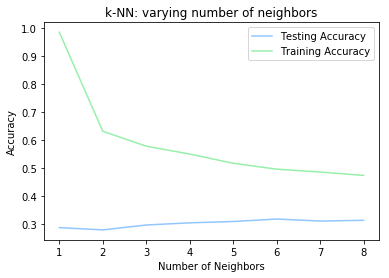

In [6]:
# split train/test at 30%
X_train, X_test, y_train, y_test = train_test_split(df[['muscle', 'participant', 'relative_mvc', 'test']], df['dataset'],
                                                   test_size=.3, random_state=21, stratify=df['dataset'])

# test different k neighbors number
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure()
plt.title('k-NN: varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

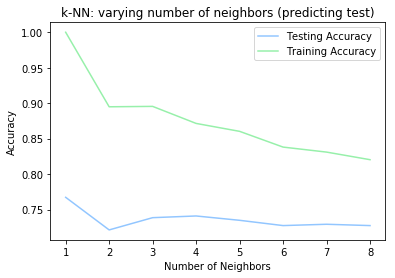

In [14]:
features = ['dataset', 'participant', 'muscle', 'relative_mvc']
target = 'test'

# split train/test at 30%
X_train, X_test, y_train, y_test = train_test_split(df[features], df['dataset'],
                                                   test_size=.3, random_state=21, stratify=df[target])

# test different k neighbors number
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure()
plt.title('k-NN: varying number of neighbors (predicting {})'.format(target))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

With 4 neighbors, we are able to predict the test used at 75% (_which is fairly bad_)